In [15]:
import sqlite3
import graphlab as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
pwd

u'/home/jcapitz/Documents/kaggle/deptedu/CollegeScorecard_Raw_Data'

In [17]:
ls

CW2000.xlsx                                    MERGED1996_PP.csv
CW2001.xlsx                                    MERGED1997_PP.csv
CW2002.xlsx                                    MERGED1998_PP.csv
CW2003.xlsx                                    MERGED1999_PP.csv
CW2004.xlsx                                    MERGED2000_PP.csv
CW2005.xlsx                                    MERGED2001_PP.csv
CW2006.xlsx                                    MERGED2002_PP.csv
CW2007.xlsx                                    MERGED2003_PP.csv
CW2008.xlsx                                    MERGED2004_PP.csv
CW2009.xlsx                                    MERGED2005_PP.csv
CW2010.xlsx                                    MERGED2006_PP.csv
CW2011.xlsx                                    MERGED2007_PP.csv
CW2012.xlsx                                    MERGED2008_PP.csv
CW2013.xlsx                                    MERGED2009_PP.csv
CW2014.xlsx                                    MERGED2010_PP.csv
CollegeScorecardDataDicti

In [18]:
t2013 = gl.SFrame.read_csv('~/Documents/kaggle/deptedu/CollegeScorecard_Raw_Data/MERGED2013_PP.csv',verbose=False)

In [19]:
len(t2013.column_names())

1729

In [20]:
t2013[2:50]['TUITFTE']

dtype: int
Rows: 48
[12057, 8322, 7813, 12198, 2371, 5094, 7625, 13186, 11928, 2056, 6023, 14726, 2129, 2187, 10997, 1643, 1624, 1927, 2707, 1312, 8048, 9074, 10138, 1348, 6192, 1084, 2670, 2985, 7626, 1576, 9161, 1757, 2443, 5101, 10339, 7161, 1338, 6530, 1904, 11909, 3125, 10722, 1331, 1692, 17548, 4873, 2285, 2092]

In [21]:
t2013.shape

(6711, 1729)

In [38]:
most_recent = gl.SFrame.read_csv('~/Documents/kaggle/deptedu/most_recent_data.csv',verbose=False)

In [48]:
def kill_null(x):
    if x == 'NULL':
        x = ''
    return x

In [49]:
x='NULL'

In [50]:
kill_null(x)

''

In [51]:
x

'NULL'

In [52]:
most_recent['TUITFTE']

dtype: str
Rows: 7482
['9063', '9033', '12057', '8322', '7813', '12198', '2371', '5094', '7625', '13186', '11928', '2056', '6023', '14726', '2129', '2187', '10997', '1643', '1624', '1927', '2707', '1312', '8048', '9074', '10138', '1348', '6192', '1084', '2670', '2985', '7626', '1576', '9161', '1757', '2443', '5101', '10339', '7161', '1338', '6530', '1904', '11909', '3125', '10722', '1331', '1692', '17548', '4873', '2285', '2092', '6914', '10653', '10496', '10367', '13302', '2371', '8133', 'NULL', 'NULL', 'NULL', 'NULL', 'NULL', '14071', '13741', '1857', '5732', '5777', '6510', '6158', '13615', '5501', '20340', '3126', '6193', '13190', '19717', '8231', '7447', '62758', 'NULL', '5550', '6018', '11721', '13311', '11942', '14468', '7119', '11919', '25798', '11705', '746', '12051', '15423', '9287', '1226', '10282', '8134', '524', '8704', '8290', ... ]

In [57]:
tuition_fulltime = most_recent['TUITFTE'].apply(kill_null)
tuition_fulltime #= tuition_fulltime.astype(float)

dtype: str
Rows: 7482
['9063', '9033', '12057', '8322', '7813', '12198', '2371', '5094', '7625', '13186', '11928', '2056', '6023', '14726', '2129', '2187', '10997', '1643', '1624', '1927', '2707', '1312', '8048', '9074', '10138', '1348', '6192', '1084', '2670', '2985', '7626', '1576', '9161', '1757', '2443', '5101', '10339', '7161', '1338', '6530', '1904', '11909', '3125', '10722', '1331', '1692', '17548', '4873', '2285', '2092', '6914', '10653', '10496', '10367', '13302', '2371', '8133', '', '', '', '', '', '14071', '13741', '1857', '5732', '5777', '6510', '6158', '13615', '5501', '20340', '3126', '6193', '13190', '19717', '8231', '7447', '62758', '', '5550', '6018', '11721', '13311', '11942', '14468', '7119', '11919', '25798', '11705', '746', '12051', '15423', '9287', '1226', '10282', '8134', '524', '8704', '8290', ... ]

In [54]:
most_recent.shape

(7482, 1728)

ValueError: could not convert string to float: 

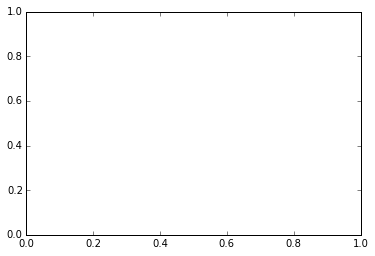

In [55]:
plt.plot(tuition_fulltime)

In [25]:
conn = sqlite3.connect()
c = conn.cursor()

TypeError: Required argument 'database' (pos 1) not found